In [20]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

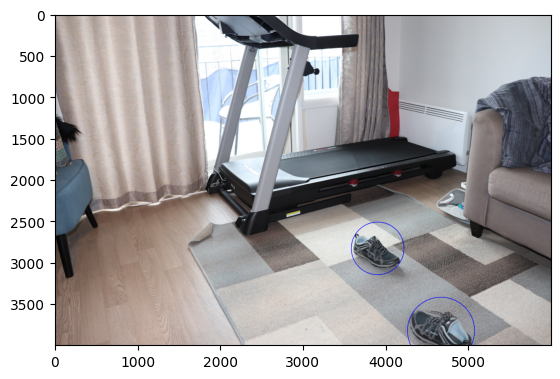

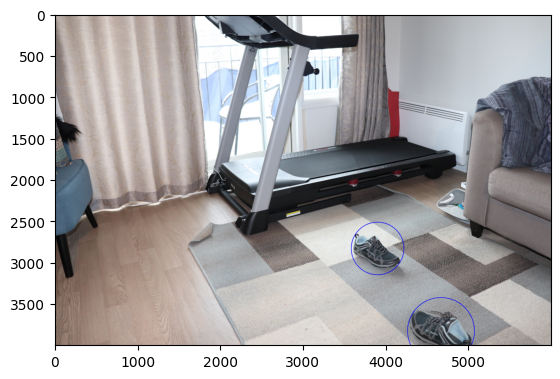

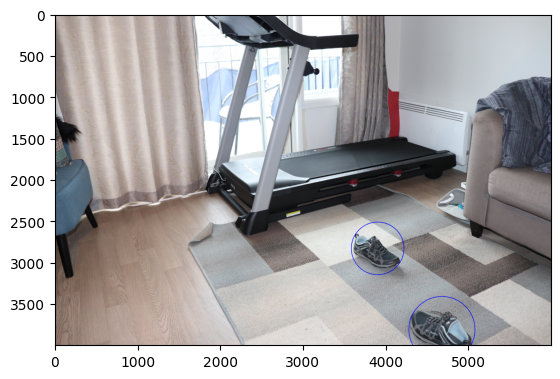

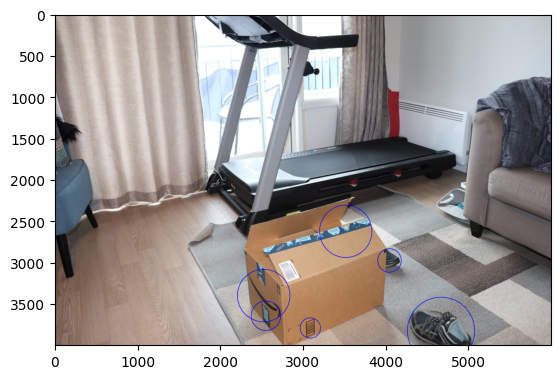

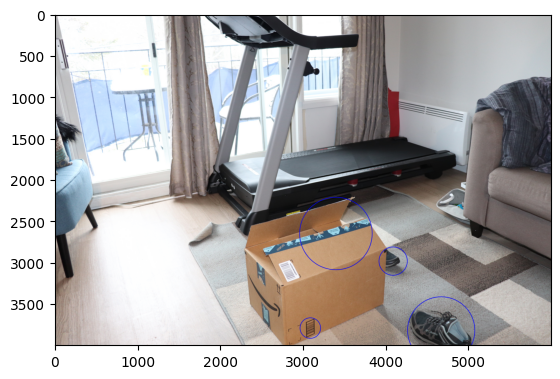

In [ ]:
####### Ici, décommenter l'images correspondant à la pièce que vous voulez voire
#imageref = cv2.imread('Images/Cuisine/Reference.JPG',cv2.IMREAD_GRAYSCALE)
#imageref = cv2.imread('Images/Chambre/Reference.JPG',cv2.IMREAD_GRAYSCALE)
imageref = cv2.imread('Images/Salon/Reference.JPG',cv2.IMREAD_GRAYSCALE)

list_of_image_paths_Cuisine = ['./Images/Cuisine/IMG_6562.JPG', './Images/Cuisine/IMG_6563.JPG','./Images/Cuisine/IMG_6564.JPG','./Images/Cuisine/IMG_6565.JPG']
list_of_image_paths_Chambre = ['./Images/Chambre/IMG_6567.JPG','./Images/Chambre/IMG_6568.JPG','./Images/Chambre/IMG_6568.JPG','./Images/Chambre/IMG_6569.JPG','./Images/Chambre/IMG_6570.JPG','./Images/Chambre/IMG_6571.JPG','./Images/Chambre/IMG_6572.JPG','./Images/Chambre/IMG_6573.JPG']
list_of_image_paths_Salon = ['./Images/Salon/IMG_6551.JPG', './Images/Salon/IMG_6552.JPG','./Images/Salon/IMG_6553.JPG','./Images/Salon/IMG_6554.JPG','./Images/Salon/IMG_6555.JPG','./Images/Salon/IMG_6556.JPG','./Images/Salon/IMG_6557.JPG','./Images/Salon/IMG_6558.JPG','./Images/Salon/IMG_6559.JPG','./Images/Salon/IMG_6560.JPG']

#Boucle qui parcours toute les images de la pièce
###### Ici, changer le nom de la liste en fonction de la pièce à voir
for i in list_of_image_paths_Salon:

    #L'image i est en gris
    image_gris = cv2.imread(i,cv2.IMREAD_GRAYSCALE)
    image = cv2.imread(i)


    thresh1or = cv2.threshold(imageref,80,255,cv2.THRESH_TOZERO)[1]
    thresh1 = cv2.threshold(image_gris,80,255,cv2.THRESH_TOZERO)[1]

    # Soustraction de deux images
    soustraction = cv2.subtract(thresh1or, thresh1)

    # Filtre de seuillage plus agressif
    _, end5_thresh = cv2.threshold(soustraction, 150, 255, cv2.THRESH_BINARY)

    # Réduction du bruit filtre gaussien
    blurred = cv2.GaussianBlur(end5_thresh, (5, 5), 0)

    # Filtre kernel
    kernel = np.ones((9,9),np.uint8)
    end5_cleaned = cv2.morphologyEx(blurred, cv2.MORPH_CLOSE, kernel)

    # Trouver les contours dans l'image
    contours, _ = cv2.findContours(end5_cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    hauteur_image = imageref.shape[0]  #hauteur de l'image
    limite_hauteur = hauteur_image / 2  #  moitié de la hauteur de l'image
    taille_minimale = 19000
    taille_max =1000000

    # Copie de l'image d'origine pour dessiner dessus
    img_with_circles = image.copy()

    # Parcourir tous les contours détectés pour cette image
    for contour in contours:
        (x, y), radius = cv2.minEnclosingCircle(contour)
        center = (int(x), int(y))
        radius = int(radius)

        # Vérifier si le contour est en dessous de la moitié de la hauteur de l'image
        # et s'il a une taille minimale requise
        if y + radius > limite_hauteur and cv2.contourArea(contour) > taille_minimale and cv2.contourArea(contour) < taille_max:
            # Dessiner un cercle englobant pour chaque contour qui répond aux critères
            cv2.circle(img_with_circles, center, radius, (255, 0, 0), 5)
    img_with_circlesA = cv2.cvtColor(img_with_circles, cv2.COLOR_BGR2RGB)
    plt.imshow(img_with_circlesA)
    plt.show()

